<a href="https://colab.research.google.com/github/M20Jay/Data-Science-Portfolio/blob/main/Credit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# loading wine dataset
path = "/content/drive/MyDrive/Python Dataset/Datasets/CreditPrediction (1).csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.shape

(10167, 20)

In [ ]:
print(df.head(5))

   CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0  768805383          45.0      M                3     High School   
1  818770008          49.0      F                5        Graduate   
2  713982108          51.0      M                3        Graduate   
3  769911858          40.0      F                4     High School   
4  709106358          40.0      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue            39.0   
1            NaN  Less than $40K          Blue            44.0   
2        Married    $80K - $120K          Blue            36.0   
3            NaN  Less than $40K          Blue            34.0   
4        Married     $60K - $80K           NaN            21.0   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                       5.0                       1                      3   
1                       6.

In [ ]:
#Data Preprocessing and Visualization: Geting the number of columns of object datatype.
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 5


In [ ]:
# Dropping CLIENTNUM column
df.drop(['CLIENTNUM'],axis=1,inplace=True)

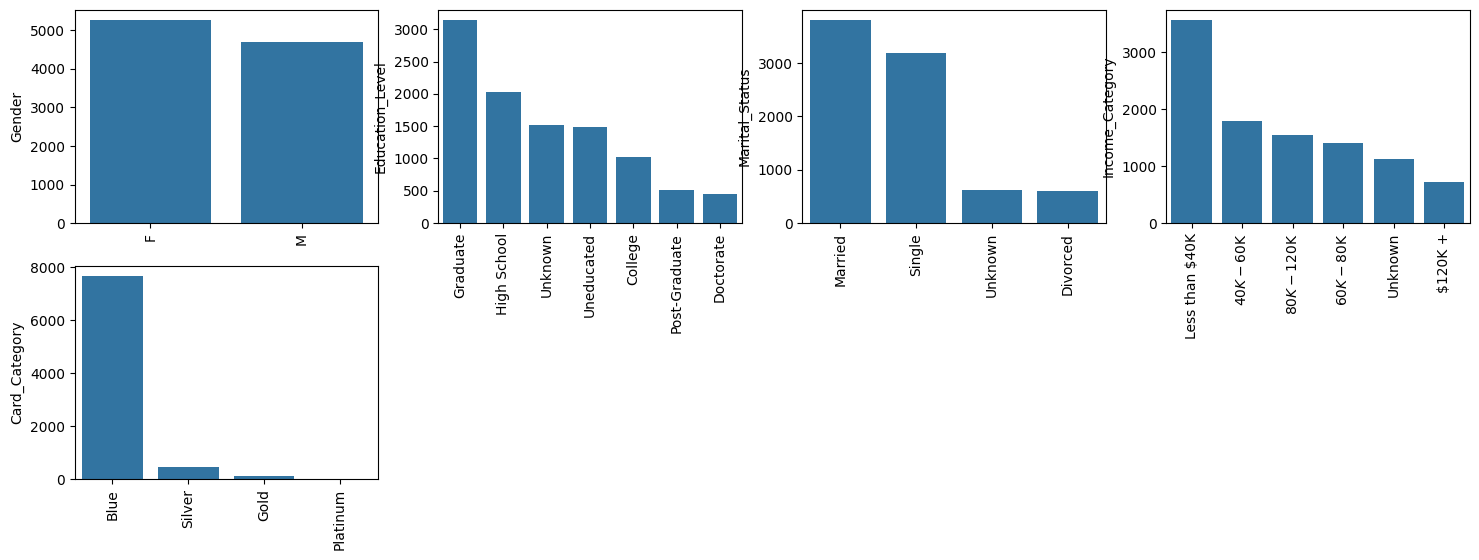

In [ ]:
#Visualizing all the unique values in columns using barplot
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

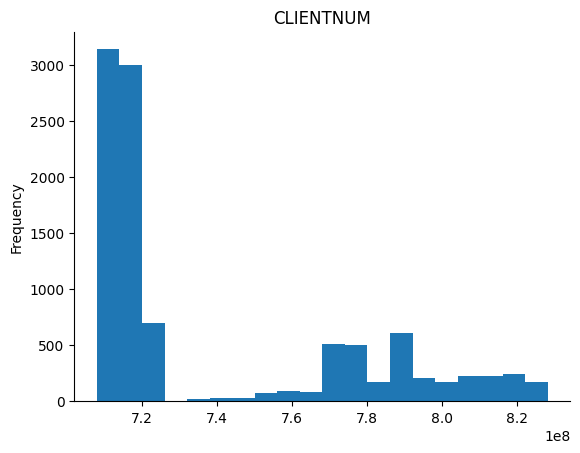

In [ ]:
# @title CLIENTNUM

from matplotlib import pyplot as plt
df['CLIENTNUM'].plot(kind='hist', bins=20, title='CLIENTNUM')
plt.gca().spines[['top', 'right',]].set_visible(False)

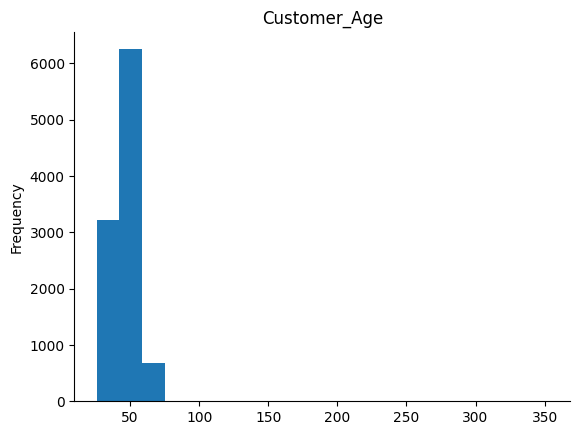

In [ ]:
# @title Customer_Age

from matplotlib import pyplot as plt
df['Customer_Age'].plot(kind='hist', bins=20, title='Customer_Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

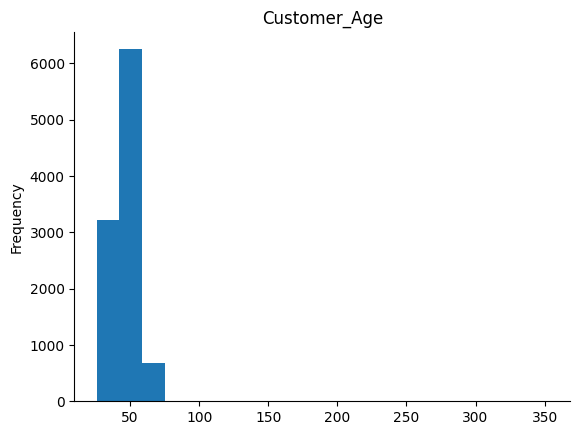

In [ ]:
# @title Customer_Age

from matplotlib import pyplot as plt
df['Customer_Age'].plot(kind='hist', bins=20, title='Customer_Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Transforming catgorical variables into int datatype.

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])


In [ ]:
# Again checking the object datatype columns- where there is any categorical variable remaining
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [ ]:
# Quantitative analysis, and data visualizations
df.describe()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
count,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,9944.000000,10147.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,0.0
mean,46.753817,0.501721,2.346513,3.094325,1.952887,2.864562,0.906560,35.913415,3.813245,2.341595,2.455887,8632.552346,1162.176748,0.759721,4402.349661,64.864463,0.712192,0.274716,NaN
std,13.520505,0.537747,1.298701,1.834553,1.198006,1.505074,1.622596,7.980102,1.554741,1.010502,1.105580,9087.333842,815.082643,0.219054,3393.953441,23.461680,0.237934,0.275638,NaN
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2556.500000,348.500000,0.631000,2155.500000,45.000000,0.582000,0.022000,NaN
50%,46.000000,0.000000,2.000000,3.000000,2.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,0.736000,3900.000000,67.000000,0.702000,0.175000,NaN
75%,52.000000,1.000000,3.000000,5.000000,3.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1783.000000,0.859000,4740.000000,81.000000,0.818000,0.502500,NaN
max,352.330517,2.000000,5.000000,6.000000,4.000000,5.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


In [ ]:
# Replace 'Unknown' with NaN and then drop rows with NaN in 'Card_Category'
df['Card_Category'].replace({'Unknown': None}, inplace=True)
df['Income_Category'].replace({'Unknown': None}, inplace=True)
df['Education_Level'].replace({'Unknown': None}, inplace=True)
df['Income_Category'].replace({'Unknown': None}, inplace=True)

In [ ]:
# Dropping rows with NaN
df.dropna(subset=['Card_Category'], inplace=True)
df.dropna(subset=['Income_Category'], inplace=True)
df.dropna(subset=['Education_Level'], inplace=True)
df.dropna(subset=['Income_Category'], inplace=True)

In [ ]:
#Again checking  the object datatype columns. Finding out if there is still any left.
# To find the number of columns with
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 5


In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
count,8.243000e+03,8243.000000,8090.000000,8243.000000,8243.000000,6686.000000,8243.000000,8243.000000,8072.000000,8225.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,8243.000000,0.0
mean,7.393323e+08,46.790025,0.470087,2.344656,2.660924,1.841011,2.744147,1.085648,35.970515,3.811672,2.342108,2.449230,8634.957358,1159.537547,0.760194,4394.423268,64.880383,0.713234,0.275255,NaN
std,3.703867e+07,13.611339,0.499135,1.306371,1.918229,0.862412,1.716408,0.336909,7.982441,1.563867,1.008533,1.100368,9093.321630,815.931312,0.218933,3390.671619,23.596220,0.237950,0.275772,NaN
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130757e+08,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2551.500000,319.500000,0.630000,2147.500000,45.000000,0.583000,0.020000,NaN
50%,7.180004e+08,46.000000,0.000000,2.000000,3.000000,2.000000,2.000000,1.000000,36.000000,4.000000,2.000000,2.000000,4541.000000,1271.000000,0.737000,3895.000000,67.000000,0.703000,0.178000,NaN
75%,7.739079e+08,52.000000,1.000000,3.000000,3.000000,2.000000,4.000000,1.000000,40.000000,5.000000,3.000000,3.000000,11081.500000,1784.000000,0.859000,4739.000000,81.000000,0.821000,0.505000,NaN
max,8.283431e+08,352.330517,1.000000,5.000000,6.000000,4.000000,6.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,17995.000000,139.000000,3.714000,0.999000,NaN


In [ ]:
#finding out if there is any missing values

for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())

df.isna().sum()

Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 19                 10167
dtype: int64

In [ ]:
# dropping the unamed column
df.drop(columns=['Unnamed: 19'], inplace=True)

KeyError: "['Unnamed: 19'] not found in axis"

In [ ]:
# Checking the relationship between variables
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',

In [ ]:
df.shape

(8243, 19)

<Axes: >

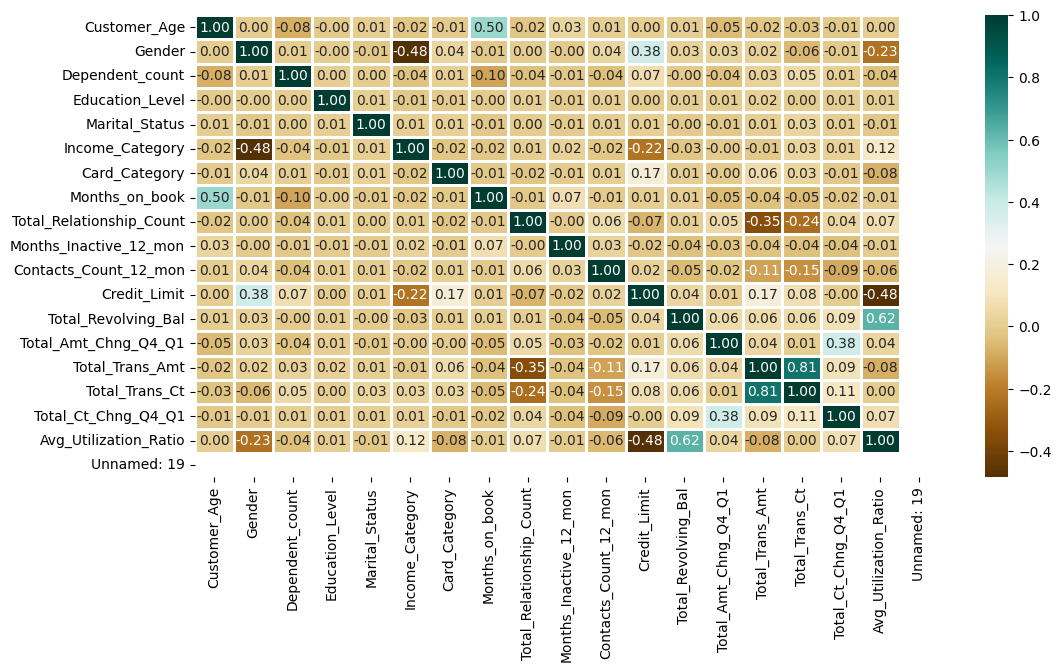

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

In [ ]:
#Creating a new variable " Loan Status"
# Create an empty list to store loan status values
loan_status = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Check if the 'month_inactive_payment' value is less than 1
    if row['Months_Inactive_12_mon'] < 1:
        # If less than 1, assign 1 (indicating give loan)
        loan_status.append(1)
    else:
        # If more than or equal to 1, assign 0 (indicating don't give loan)
        loan_status.append(0)

# Add the loan_status list as a new column in the DataFrame
df['loan_status'] = loan_status

In [ ]:
print(df.head(5))

   Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0          45.0       1                3                3               1   
1          49.0       0                5                2               4   
2          51.0       1                3                2               1   
3          40.0       0                4                3               4   
4          40.0       1                3                5               1   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                2              0            39.0                       5.0   
1                4              0            44.0                       6.0   
2                3              0            36.0                       4.0   
3                4              0            34.0                       3.0   
4                2              4            21.0                       5.0   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit

In [ ]:
#Splitting Dataset

from sklearn.model_selection import train_test_split

X = df.drop(['loan_status'],axis=1)
Y = df['loan_status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6100, 18), (4067, 18), (6100,), (4067,))

In [ ]:
#Model Training and Evaluation

In [ ]:
#  KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Calculating the accuracy of the model
print(knn.score(X_test, Y_test))

0.9972953036636342


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Random Forest Classification
# Training the classifier
rf_classifier.fit(X_train, Y_train)
from sklearn import metrics
print()
# Calculating the accuracy of the model
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(Y_test, y_pred))




ACCURACY OF THE MODEL: 1.0


In [ ]:
# Alternative codes for predicting the accuracy of the 3 models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  KNeighborsClassifier = 99.70491803278688
Accuracy score of  LogisticRegression = 99.72131147540983


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
